## Tasca M6 T01 Algoritmes Aprenentatge Supervisat: Linear Regression


- **Exercici 1**

    - Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.


- **Exercici 2**

    - Compara’ls en base al MSE i al R2.


- **Exercici 3**

    - Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.


- **Exercici 4**

    - Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).


- **Exercici 5**

    - No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [1]:
# Import required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython.display import Image ##use the IPython Image object to display an Image
##To Plot interactively within an IPython notebook
%matplotlib inline 
import matplotlib.image as mpimg
import seaborn as sns 

import sklearn
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


# Import necessary modules

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn import tree

from pprint import pprint

## Hyper-Parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

<div class="alert alert-success h2" role="alert">
    <b>Descarrega i pre-processat de les dades</b>
</div>

In [2]:
## Put the data in a data frame
df = pd.read_csv("housing data.csv", header=None) ## with header=Non, pandas assigns an index
df

0     1      2   3      4      5     6       7   8      9     10  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..    ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273.0  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273.0  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273.0  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273.0  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273.0  21.0   

         11    12    13  
0    396.90  4.98  24.0  
1    396.90  9.14  21.6  
2    392.83  4.03  34.7  
3    394.63  2.94  33.4  
4    396.90  5.33  36.2  
..      ...   ...   ...  
501  391.99  9.67  22.4  
502  396.90  9.08  20.6  
503  396.90  5.64  23.9  
504  393.45  6.48  22.0  
505  396.90  7.88  11.9  

[506 rows x 14 columns]

- Com que el dataframe no te el nom de les columnes, les afegim. Els noms venen de l'arxiu housing data description.

- **Attribute Information:**

    1. **CRIM:**      per capita crime rate by town
    2. **ZN:**        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. **INDUS:**     proportion of non-retail business acres per town
    4. **CHAS:**      Charles River dummy variable (= 1 if tract boundsriver; 0 otherwise)
    5. **NOX:**       nitric oxides concentration (parts per 10 million)
    6. **RM:**        average number of rooms per dwelling
    7. **AGE:**       proportion of owner-occupied units built prior to 1940
    8. **DIS:**       weighted distances to five Boston employment centres
    9. **RAD:**       index of accessibility to radial highways
    10. **TAX:**      full-value property-tax rate per 10,000 dolars
    11. **PTRATIO:**  pupil-teacher ratio by town
    12. **B:**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. **LSTAT:**    % lower status of the population
    14. **MEDV:**     Median value of owner-occupied homes in 1000's dolars

In [3]:
## Change column names
columNames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = columNames
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

- Exploració basica del dataframe

In [4]:
print(df.shape)
df.describe().transpose().round(3)

(506, 14)


count     mean      std      min      25%      50%      75%      max
CRIM     506.0    3.614    8.602    0.006    0.082    0.257    3.677   88.976
ZN       506.0   11.364   23.322    0.000    0.000    0.000   12.500  100.000
INDUS    506.0   11.137    6.860    0.460    5.190    9.690   18.100   27.740
CHAS     506.0    0.069    0.254    0.000    0.000    0.000    0.000    1.000
NOX      506.0    0.555    0.116    0.385    0.449    0.538    0.624    0.871
RM       506.0    6.285    0.703    3.561    5.885    6.208    6.624    8.780
AGE      506.0   68.575   28.149    2.900   45.025   77.500   94.075  100.000
DIS      506.0    3.795    2.106    1.130    2.100    3.207    5.188   12.126
RAD      506.0    9.549    8.707    1.000    4.000    5.000   24.000   24.000
TAX      506.0  408.237  168.537  187.000  279.000  330.000  666.000  711.000
PTRATIO  506.0   18.456    2.165   12.600   17.400   19.050   20.200   22.000
B        506.0  356.674   91.295    0.320  375.378  391.440  396.225  396.900
LSTAT    506.0   12.653    7.141    1.730    6.950   11.360   16.955   37.970
MEDV     506.0   22.533    9.197    5.000   17.025   21.200   25.000   50.000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


- veiem que no té nuls totes les dades són numèriques, algunes integers i les altres floats.



- Fem algunes visualitzacions interesants per veure visualment la correlació de les dades i les seva distribucions

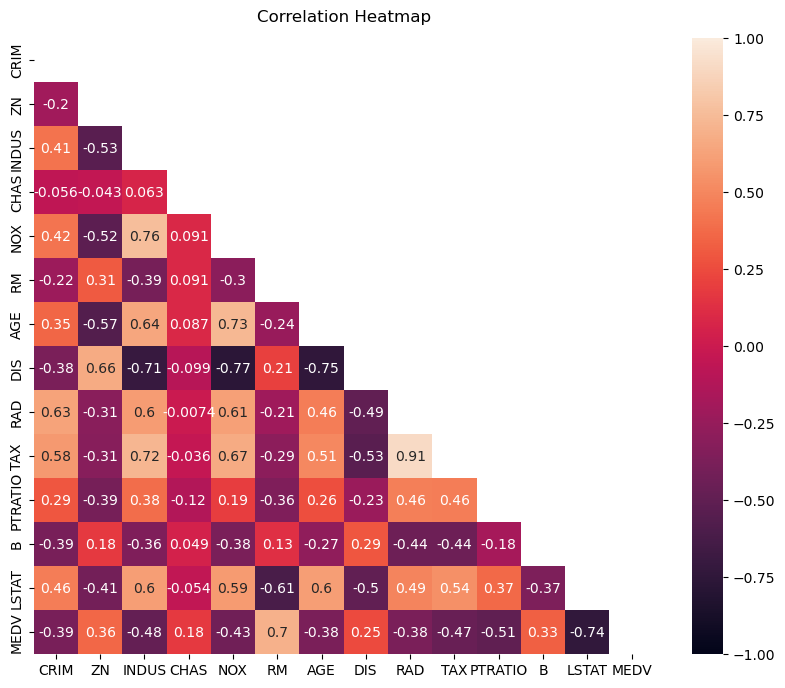

In [6]:
##Figure size:
plt.figure(figsize=(10,8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr()))
## from https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True);
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

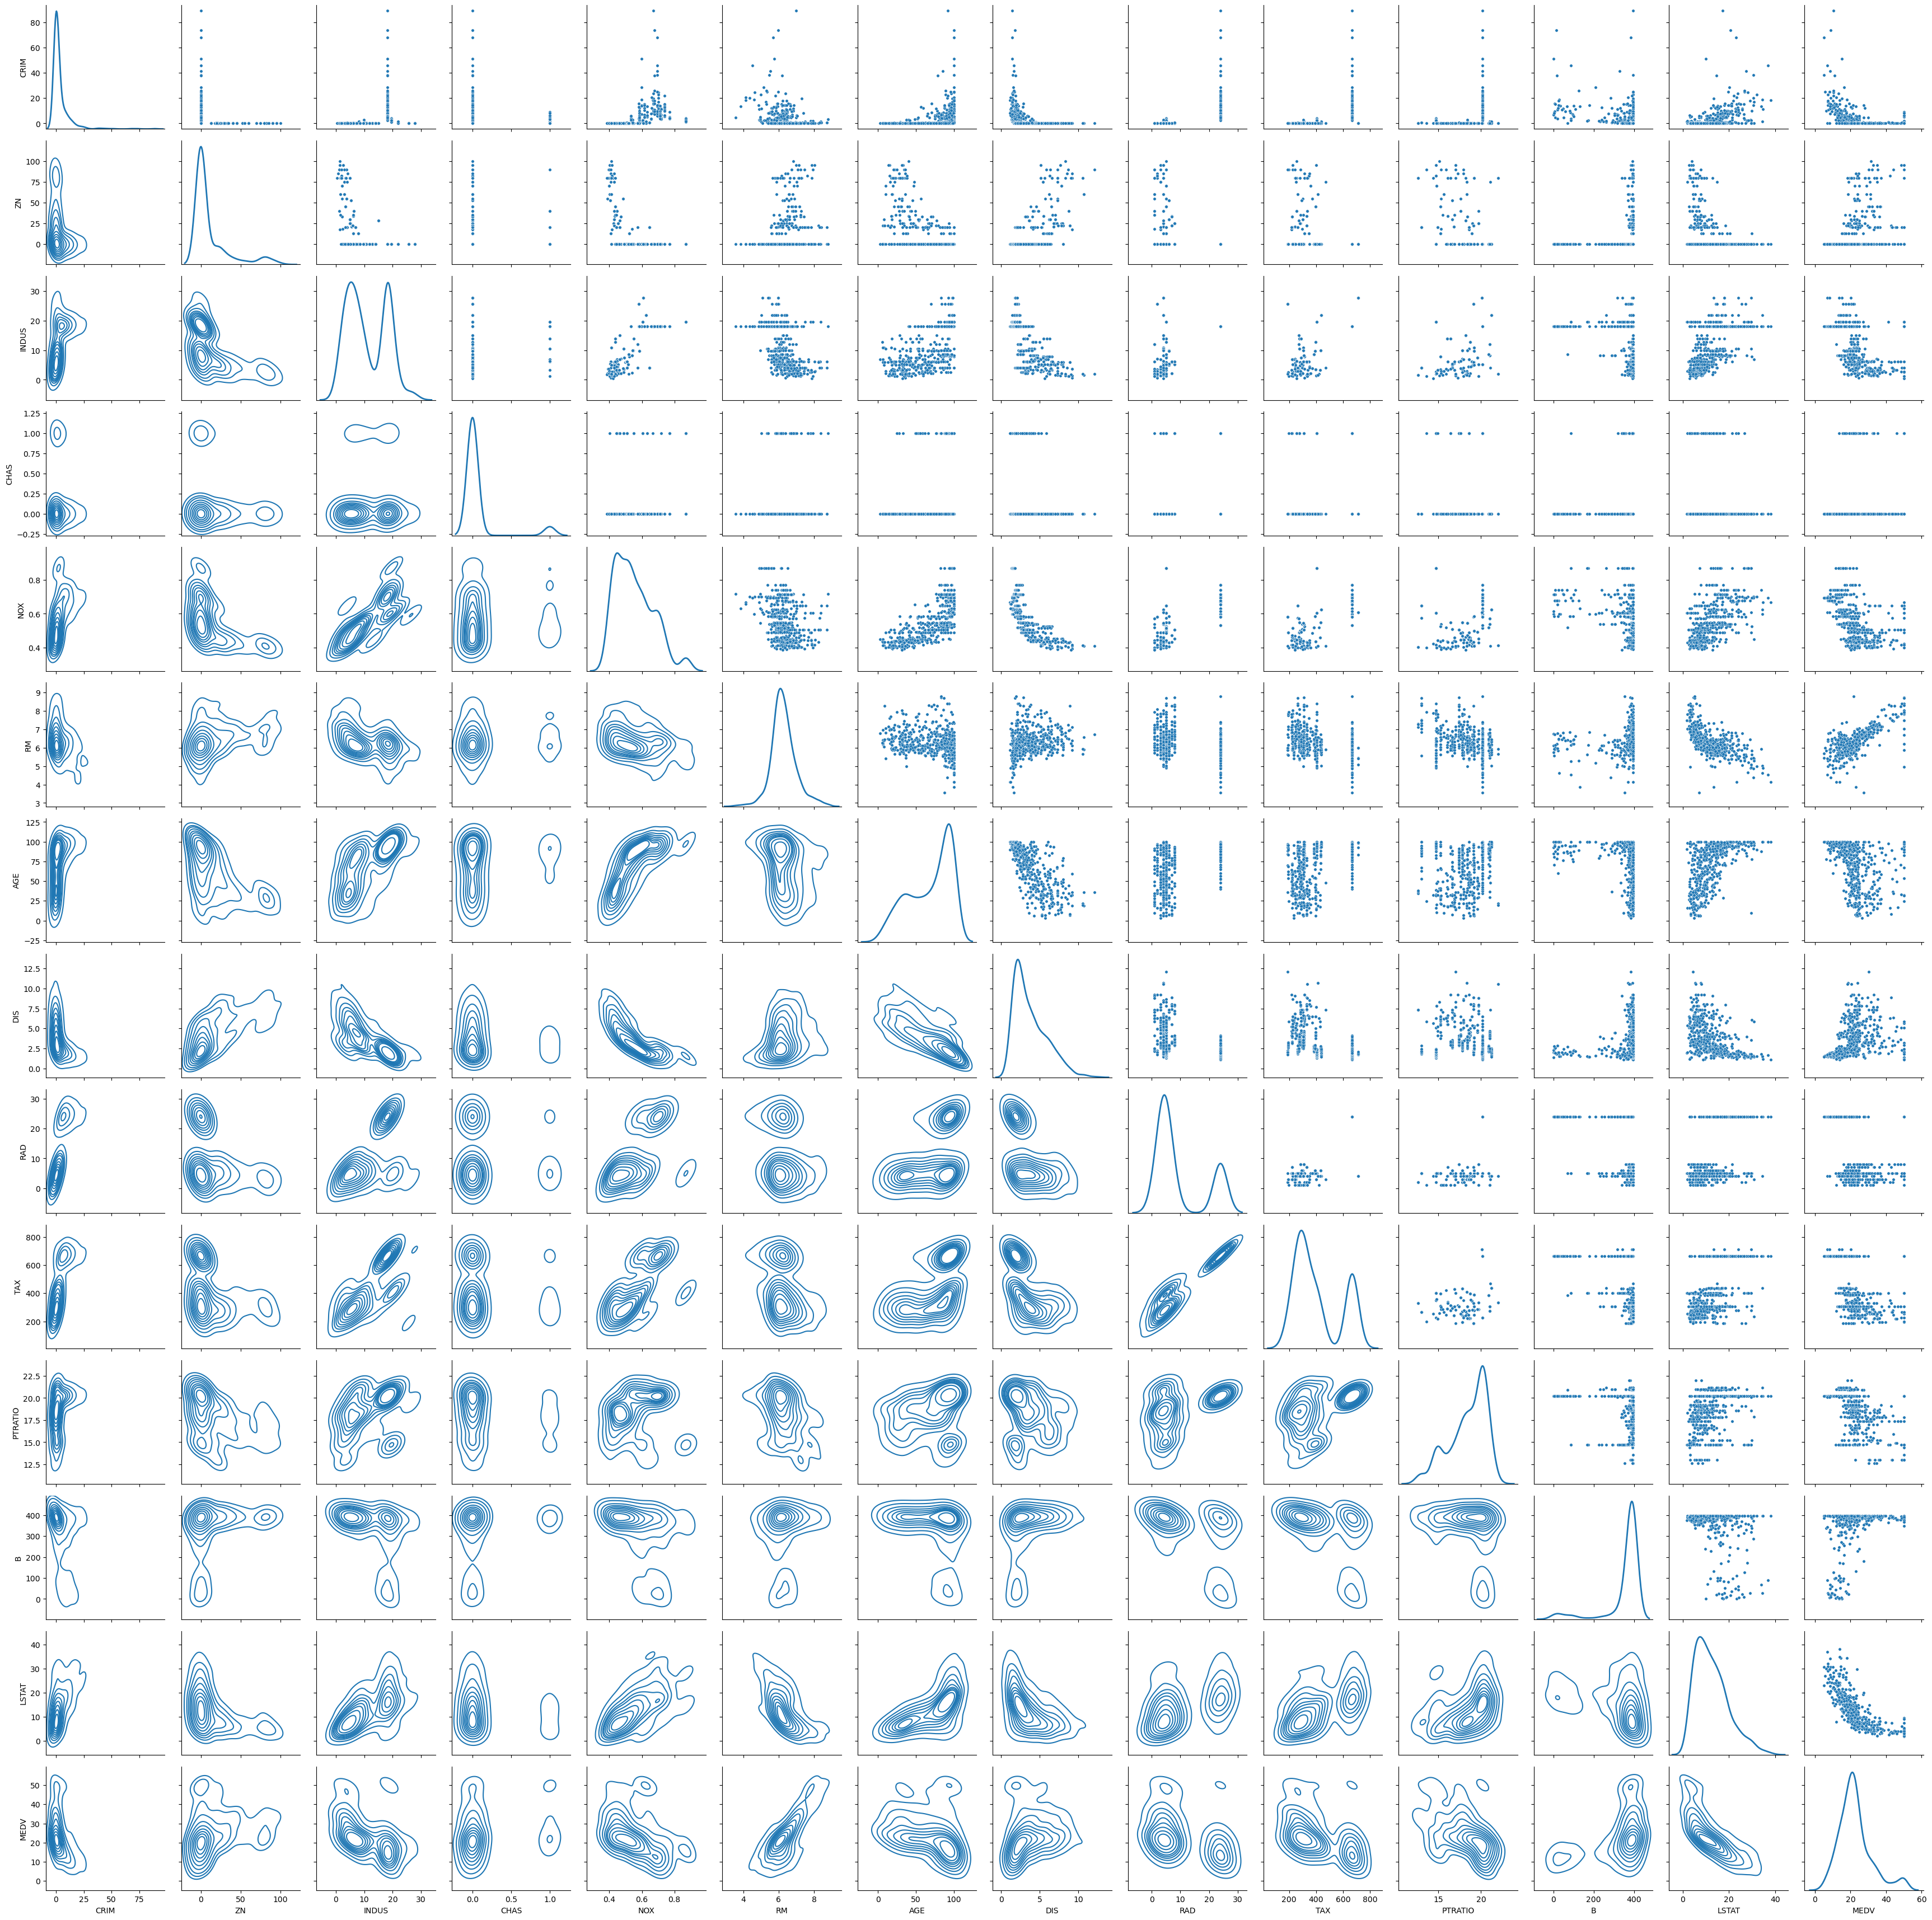

In [7]:
##Ploting a Pair plot with all variebles
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.show()

#### Agafem el mateix preprocessat del sprint 5
- Separem les columnes segons necessitin un tipus de preprocessat o un altre

In [7]:
#columnsNamesAll = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
numeric_features_Outliers = ['CRIM','ZN','RM', 'RAD', 'TAX', 'B']
numeric_features_NO_Outliers = ['INDUS','CHAS','NOX', 'AGE', 'DIS', 'PTRATIO', 'LSTAT']


In [8]:
## Normalization with outliers
transformer = preprocessing.RobustScaler()
df_preprocessed = df.copy()
df_preprocessed[numeric_features_Outliers] = transformer.fit_transform(df[numeric_features_Outliers])
## Normalization withOUT outliers
transformer = preprocessing.Normalizer()
df_preprocessed[numeric_features_NO_Outliers] = transformer.fit_transform(df[numeric_features_NO_Outliers])
df_preprocessed


CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0   -0.069593  1.44  0.034313   0.0  0.007991  0.496612  0.968476  0.060753   
1   -0.063755  0.00  0.086371   0.0  0.005730  0.287940  0.963883  0.060681   
2   -0.063760  0.00  0.109865   0.0  0.007288  1.323171  0.949467  0.077187   
3   -0.062347  0.00  0.043620   0.0  0.009164  1.069783  0.916424  0.121300   
4   -0.052144  0.00  0.037623   0.0  0.007904  1.271680  0.935394  0.104623   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501 -0.053930  0.00  0.161480   0.0  0.007756  0.521003  0.935312  0.033549   
502 -0.058759  0.00  0.147360   0.0  0.007078 -0.119919  0.947403  0.028255   
503 -0.054450  0.00  0.126450   0.0  0.006073  1.039973  0.964535  0.022974   
504 -0.040867  0.00  0.128601   0.0  0.006177  0.793360  0.962620  0.025751   
505 -0.058164  0.00  0.140786   0.0  0.006762 -0.241870  0.953518  0.029561   

      RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0   -0.20 -0.087855  0.227265  0.261902  0.073973  24.0  
1   -0.15 -0.227390  0.217454  0.261902  0.111659  21.6  
2   -0.15 -0.227390  0.276604  0.066675  0.062624  34.7  
3   -0.10 -0.279070  0.374173  0.153016  0.058827  33.4  
4   -0.10 -0.279070  0.322728  0.261902  0.091986  36.2  
..    ...       ...       ...       ...       ...   ...  
501 -0.20 -0.147287  0.284248  0.026382  0.130890  22.4  
502 -0.20 -0.147287  0.259393  0.261902  0.112157  20.6  
503 -0.20 -0.147287  0.222585  0.261902  0.059780  23.9  
504 -0.20 -0.147287  0.226372  0.096414  0.069852  22.0  
505 -0.20 -0.147287  0.247820  0.261902  0.092992  11.9  

[506 rows x 14 columns]

In [9]:
df_preprocessed.describe().round(3)

CRIM       ZN    INDUS     CHAS      NOX       RM      AGE      DIS  \
count  506.000  506.000  506.000  506.000  506.000  506.000  506.000  506.000   
mean     0.934    0.909    0.149    0.001    0.008    0.103    0.893    0.075   
std      2.393    1.866    0.077    0.004    0.003    0.952    0.125    0.077   
min     -0.070    0.000    0.013    0.000    0.004   -3.587    0.139    0.010   
25%     -0.049    0.000    0.086    0.000    0.006   -0.438    0.893    0.021   
50%     -0.000    0.000    0.159    0.000    0.007    0.000    0.936    0.040   
75%      0.951    1.000    0.194    0.000    0.010    0.562    0.953    0.102   
max     24.678    8.000    0.518    0.034    0.022    3.484    0.988    0.388   

           RAD      TAX  PTRATIO        B    LSTAT     MEDV  
count  506.000  506.000  506.000  506.000  506.000  506.000  
mean     0.227    0.202    0.298   -1.668    0.173   22.533  
std      0.435    0.435    0.153    4.379    0.073    9.197  
min     -0.200   -0.370    0.128  -18.761    0.018    5.000  
25%     -0.050   -0.132    0.199   -0.770    0.125   17.025  
50%      0.000    0.000    0.231    0.000    0.170   21.200  
75%      0.950    0.868    0.356    0.230    0.213   25.000  
max      0.950    0.984    0.860    0.262    0.779   50.000

<div class="alert alert-success h2" role="alert">
    <b>Separem en test i train</b>
</div>

In [10]:
## Creat Lists of features and target names

# Target are the values we want to predict, and convert them to array
y_target = np.array(df_preprocessed['MEDV'])

# Remove the labels from the features
# axis 1 refers to the columns
X_features = df_preprocessed.drop('MEDV', axis = 1)

# Saving feature names for later use
X_feature_namesList = list(X_features.columns)

# Convert to numpy array
X_features = np.array(X_features)

In [11]:
# Split the data into training and testing sets
##I split 70% for train and 30% for test
X_features_train, X_features_test, y_target_train, y_target_test = train_test_split(X_features, y_target, test_size=0.30, random_state=4)

## Print the train and test features
print(X_features_train.shape); print(X_features_test.shape)


(354, 13)
(152, 13)


### Exercici 1

<div class="alert alert-block alert-info">Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt. 
</div>


1. Linear Regression
2. Decision tree regressor
3. Random forest regresor
4. MLP



**1. Linear Regression**

In [12]:
## Instantiate model 
lrm = linear_model.LinearRegression()

# Train the model on training data (with fit)
linReg = lrm.fit(X_features_train, y_target_train)


In [13]:
## Predict results with the trained model on the test features
y_pred_linReg = linReg.predict(X_features_test)


**2. Decision tree regressor**

In [14]:
## Instantiate model 
dtr = DecisionTreeRegressor(random_state=42, max_depth= 4)

# Train the model on training data (with fit)
deciTree = dtr.fit(X_features_train, y_target_train)

## Predict results with the trained model on the test features
y_pred_deciTree = deciTree.predict(X_features_test)


- **Visualization of the tree**

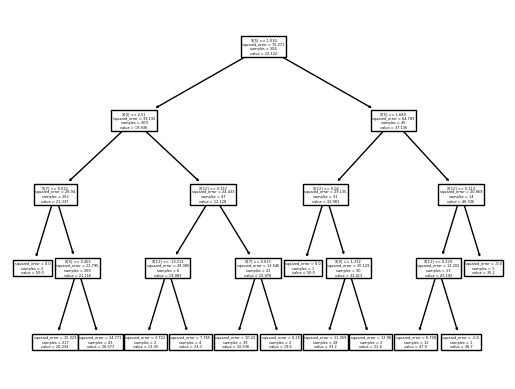

In [29]:
tree.plot_tree(deciTree);

**3. Random forest regresor**

In [15]:
## Instantiate model 
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data (with fit)
randForestReg = rfr.fit(X_features_train, y_target_train)

## Predict results with the trained model on the test features
y_pred_randForest = randForestReg.predict(X_features_test)

- **Visualization of the Forrest**

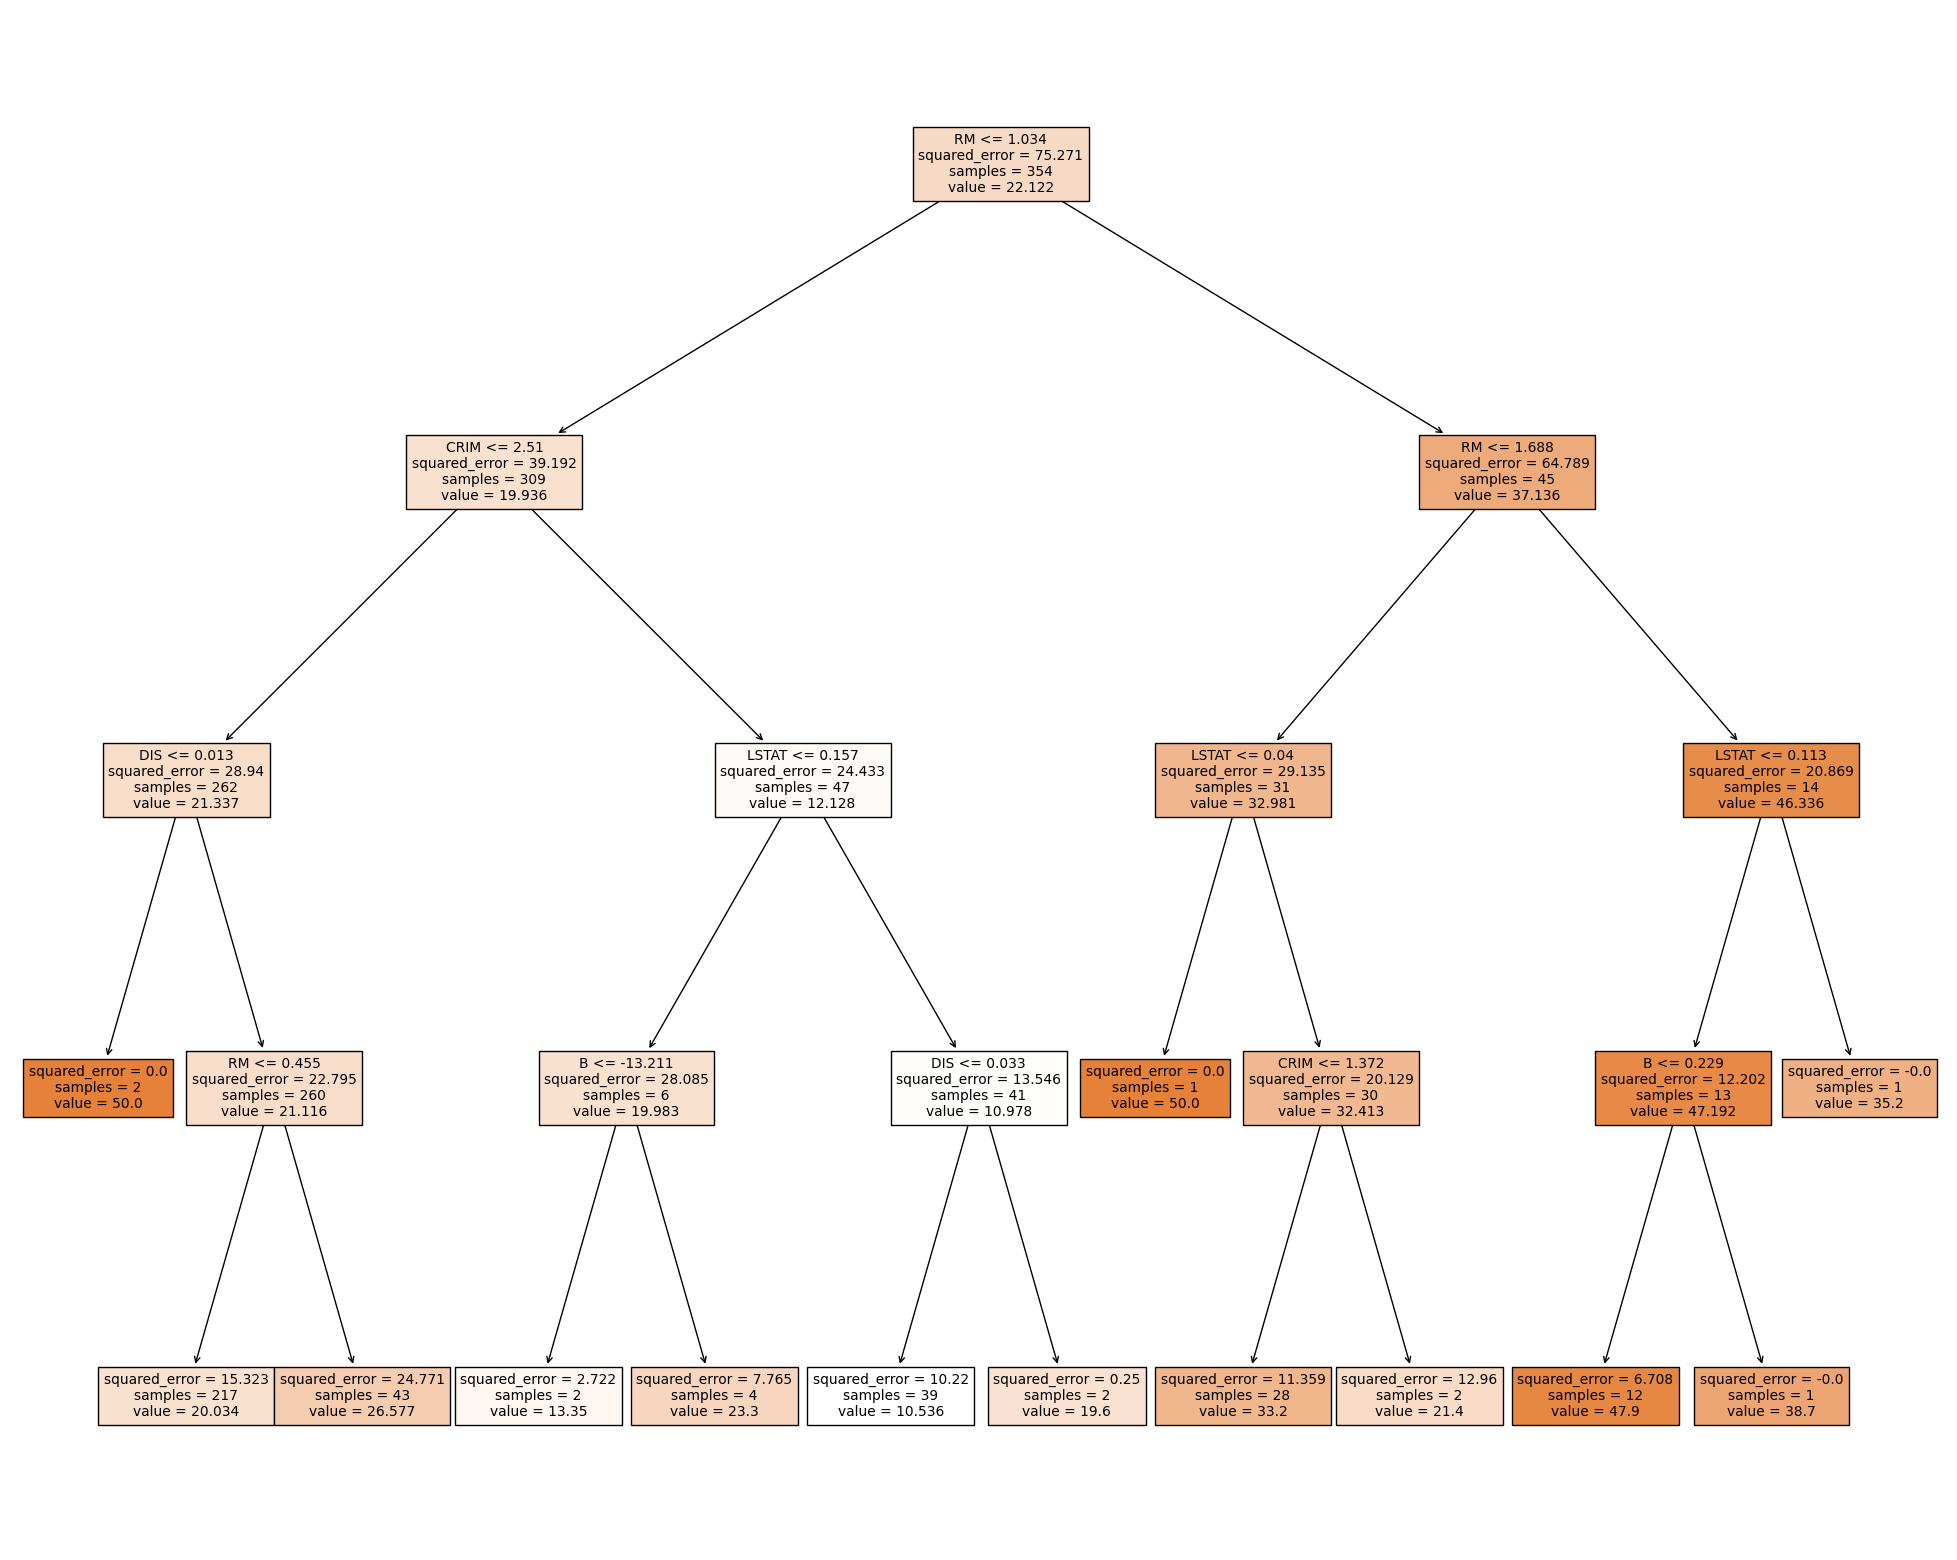

In [16]:
## Decision tree ploting with matplotlib
##Please notice, that the color of the leaf 
## is coresponding to the predicted value.
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(deciTree, 
                   feature_names=X_feature_namesList,  
                   #class_names=target_column,
                   filled=True)
##I save the figure to be able to check it properly
fig.savefig("decistion_tree.png")

**4. Multi-Layer Perceptron Regressor (MLP)**

In [17]:
## Instantiate model 
mlp = MLPRegressor(hidden_layer_sizes=(13,13,13), 
                   activation='relu', solver='adam', max_iter=10000)

# Train the model on training data (with fit)
MLPR_Reg = mlp.fit(X_features_train, y_target_train)

## Predict results with the trained model on the test features
y_pred_MLPR = MLPR_Reg.predict(X_features_test)


**0. Importancia predictors**

In [18]:
## Get the importance of precictors o f the model
importancia_predictores = pd.DataFrame(
                            {'predictor': df.drop(columns = "MEDV").columns,
                             'importancia': deciTree.feature_importances_}
                            )
print("Importancia de los predictores en el modelo Decision Tree")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo Decision Tree
-------------------------------------------


predictor  importancia
5         RM     0.695306
0       CRIM     0.170106
7        DIS     0.084696
12     LSTAT     0.040070
11         B     0.009821
1         ZN     0.000000
2      INDUS     0.000000
3       CHAS     0.000000
4        NOX     0.000000
6        AGE     0.000000
8        RAD     0.000000
9        TAX     0.000000
10   PTRATIO     0.000000

In [19]:
## Get the importance of precictors o f the model
importancia_predictores = pd.DataFrame(
                            {'predictor': df.drop(columns = "MEDV").columns,
                             'importancia': randForestReg.feature_importances_}
                            )
print("Importancia de los predictores en el modelo Random Forest Regressor")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo Random Forest Regressor
-------------------------------------------


predictor  importancia
5         RM     0.553798
0       CRIM     0.146795
12     LSTAT     0.093723
7        DIS     0.076224
10   PTRATIO     0.033735
9        TAX     0.025952
4        NOX     0.019145
11         B     0.014921
2      INDUS     0.013305
6        AGE     0.013198
8        RAD     0.004654
3       CHAS     0.003224
1         ZN     0.001326

### Exercici 2

<div class="alert alert-block alert-info">Compara’ls en base al MSE i al R2.
</div>

In [20]:
## Define a function to extract r2, mse, accuracy and MAPE errors
def evaluateModel(model, X_test, y_test, y_predicted):
    #Rsquare
    rsquare = model.score(X_test, y_test)
    #Mean square error
    mse = mean_squared_error(y_test, y_predicted)
    # Calculate the absolute errors
    errors = abs(y_predicted - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * np.mean(errors / y_test)
    # Calculate accuracy (100-MAPE)
    accuracy = 100 - mape
    # Print errors
    print('Model Performance')
    print('Rsquare: {:0.4f} degrees.'.format(rsquare))
    print('MSE: {:0.4f} degrees.'.format(mse))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return rsquare, mse, mape, accuracy

**1. Linear Regression**

In [21]:
linReg_errors = evaluateModel(linReg, X_features_test, y_target_test, y_pred_linReg)


Model Performance
Rsquare: 0.6502 degrees.
MSE: 36.5235 degrees.
Average Error: 4.1402 degrees.
Accuracy = 80.25%.


**2. Decision tree regressor**

In [22]:
deciTree_errors = evaluateModel(deciTree, X_features_test, y_target_test, y_pred_deciTree)


Model Performance
Rsquare: 0.5848 degrees.
MSE: 43.3545 degrees.
Average Error: 4.1620 degrees.
Accuracy = 78.80%.


**3. Random forest regresor**

In [23]:
randForestReg_errors = evaluateModel(randForestReg, X_features_test, y_target_test, y_pred_randForest)


Model Performance
Rsquare: 0.7780 degrees.
MSE: 23.1768 degrees.
Average Error: 2.7196 degrees.
Accuracy = 87.28%.


**4. Multi-Layer Perceptron Regressor (MLP)**

In [25]:
MLPR_Reg_errors = evaluateModel(MLPR_Reg, X_features_test, y_target_test, y_pred_MLPR)


Model Performance
Rsquare: 0.7429 degrees.
MSE: 26.8425 degrees.
Average Error: 3.0299 degrees.
Accuracy = 84.95%.


In [26]:
## List of models to apply
MLA_rsquare_compare = []
MLA_rsquare_compare.append(('R2_LR', linReg_errors[0]))
MLA_rsquare_compare.append(('R2_DTR', deciTree_errors[0]))
MLA_rsquare_compare.append(('R2_RFR', randForestReg_errors[0]))
MLA_rsquare_compare.append(('R2_MLPR', MLPR_Reg_errors[0])) 
MLA_rsquare_compare

column_names =['ErrorType', 'Error_Value']
MLA_rsquare_compare_df = pd.DataFrame(MLA_rsquare_compare, columns=column_names)
MLA_rsquare_compare_df

ErrorType  Error_Value
0     R2_LR     0.650226
1    R2_DTR     0.584807
2    R2_RFR     0.778042
3   R2_MLPR     0.742938

In [27]:
## List of models to apply
MLA_mse_compare = []
MLA_mse_compare.append(('MSE_LR', linReg_errors[1]))
MLA_mse_compare.append(('MSE_DTR', deciTree_errors[1]))
MLA_mse_compare.append(('MSE_RFR', randForestReg_errors[1]))
MLA_mse_compare.append(('MSE_MLPR', MLPR_Reg_errors[1])) 
MLA_mse_compare

column_names =['ErrorType', 'Error_Value']
MLA_mse_compare_df = pd.DataFrame(MLA_mse_compare, columns=column_names)
MLA_mse_compare_df

ErrorType  Error_Value
0    MSE_LR    36.523467
1   MSE_DTR    43.354480
2   MSE_RFR    23.176836
3  MSE_MLPR    26.842463

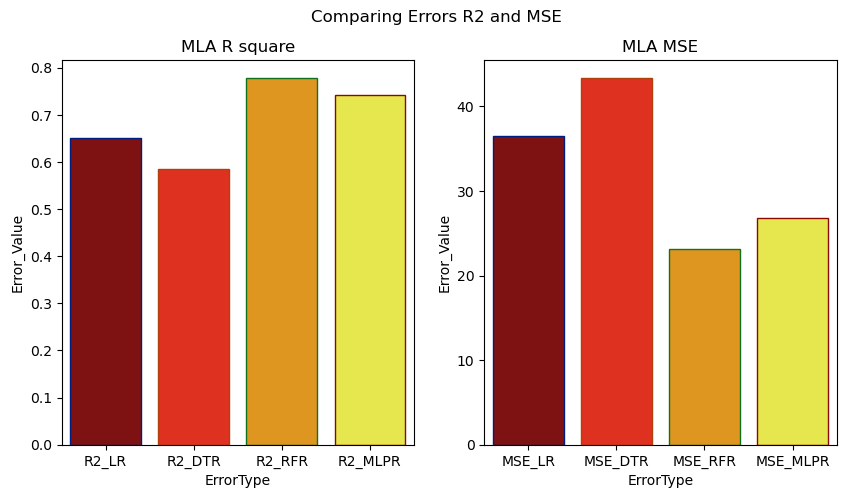

In [28]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,2, figsize = (10,5))
fig.suptitle('Comparing Errors R2 and MSE')
sns.barplot(ax=axes[0], x="ErrorType", y="Error_Value", data=MLA_rsquare_compare_df, palette='hot',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('MLA R square')
sns.barplot(ax=axes[1], x="ErrorType", y="Error_Value",data=MLA_mse_compare_df, palette='hot',edgecolor=sns.color_palette('dark',7))
axes[1].set_title('MLA MSE')
plt.show()

- **Comparativa segons els models:**

    - Clarament observem que el model amb millors valors és el Random forres amb un R2 de 0.778, i un MSE de 23.14.
    - Per ordre els següents models serien MLP el Linear Regression i finalment el Decision tree.
    - Pot ser que aquests valors siguin deguts als parametres donat per calcular el model, i en el cas de la xarxa neuronal, que no haguem fet prous iteracions.

### Exercici 3

<div class="alert alert-block alert-info">Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.
</div>


- De tots els models que he utilitzat agafo el que em dona els millors scorings, el Random forrest


**- Random Forrest**

In [29]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(randForestReg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


- The documentation on the random forest in Scikit-Learn, tells us the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features).
- We will try out a wide range of values and see what works! We will try adjusting the following set of hyperparameters:

   - n_estimators = number of trees in the foreset
   - max_features = max number of features considered for splitting a node
   - max_depth = max number of levels in each decision tree
   - min_samples_split = min number of data points placed in a node before the node is split
   - min_samples_leaf = min number of data points allowed in a leaf node
   - bootstrap = method for sampling data points (with or without replacement)
   

- Random Hyperparameter Grid

    - To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [40]:
##Parameter grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
## `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. 
##To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is
##also the default value for RandomForestRegressors and ExtraTreesRegressors. warn(
# max_features = 1
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


- El Random grid search l'hem de fer sobre totes les dades!!, i sempre ho haig de fer amb la mateixa seed!!

- per tant, haure de tornar a fer un fit del model

In [49]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfr_base = RandomForestRegressor(random_state = 42)

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr_random = RandomizedSearchCV(estimator = rfr_base, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 5, 
                               verbose=3, scoring='r2', ## We optimize to r2
                               random_state=42, 
                               n_jobs = -1)# Fit the random search model


In [50]:
# Fit the random search model
rfr_random.fit(X_features, y_target)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=3)

In [42]:
rfr_random.best_params_

{'n_estimators': 944,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 80,
 'bootstrap': True}

In [43]:
rfr_random.best_score_

0.5722598727171657

- Veig que hi ha un error en el meu procediment, ja que no té molt sentit que amb una cross validation de 5 folds amb tota la base de dades, el millor score sigui mooolt inferiror al que donava anterirorment 0.57 respecte el 0.778 que voliem millorar, però no entenc el que està passant.

- A continuació ho probo amb els sets de train i test


In [54]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfr_base_2 = RandomForestRegressor()

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfr_random_2 = RandomizedSearchCV(estimator = rfr_base_2, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 5, 
                               verbose=3, scoring='r2', ## We optimize to r2
                               random_state=42, 
                               n_jobs = -1)# Fit the random search model


In [55]:
# Fit the random search model
rfr_random_2.fit(X_features_train, y_target_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=3)

In [56]:
rfr_random_2.best_params_


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 80,
 'bootstrap': True}

In [57]:
rfr_random_2.best_score_

0.7788304278581073

In [65]:
best_random_rfr = rfr_random_2.best_estimator_

In [66]:
best_rf_r_predict = best_random_rfr.predict(X_features_test)

In [67]:
evaluateModel(best_random_rfr, X_features_test, y_target_test, best_rf_r_predict)


Model Performance
Rsquare: 0.7735 degrees.
MSE: 23.6498 degrees.
Average Error: 2.7776 degrees.
Accuracy = 86.93%.


(0.7735128988890589, 23.64979946891248, 13.072503183414499, 86.9274968165855)

- Veiem que si posem els sets de train i fem la predicció amb el test sembla que millora, però desprès amb la predicció sembla que torna a empitjorar...

- La veritat és que no entenc què estic fent malament


### Exercici 4

<div class="alert alert-block alert-info">- Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).
</div>

    

- Per tal de fer la comparativa de validacions amb els diferents sets (totes les dades o trein i test) del model, torno a fer la instanciació del model iposo els millors parametres que he trobat.

In [71]:
## Instance the model
rfr = RandomForestRegressor(n_estimators = 200, min_samples_split = 10, 
                            min_samples_leaf = 1, max_depth = 80,
                            bootstrap = True, random_state = 42)


In [73]:
scoresRF = cross_val_score(rfr, X_features, y_target, cv=5)
print(scoresRF)
print("Random forest cross validation: %0.2f accuracy with a standard deviation of %0.2f" % (scoresRF.mean(), scoresRF.std()))


[0.75427052 0.74712416 0.75261484 0.37576239 0.11388903]
Random forest cross validation: 0.55 accuracy with a standard deviation of 0.26


In [74]:
scoresRF_TT = cross_val_score(rfr, X_features_train, y_target_train, cv=5)
print(scoresRF_TT)
print("Random forest cross validation: %0.2f accuracy with a standard deviation of %0.2f" % (scoresRF_TT.mean(), scoresRF.std()))


[0.77300792 0.84361941 0.87176164 0.76096436 0.61101552]
Random forest cross validation: 0.77 accuracy with a standard deviation of 0.26


- No se molt bé que està passant, però els millors valors surten amb el test i el train

### Exercici 5

<div class="alert alert-block alert-info">- No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.
</div>


In [76]:

# axis 1 refers to the columns
X_features = df_preprocessed.drop('RM', axis = 1)

X_features

CRIM    ZN     INDUS  CHAS       NOX       AGE       DIS   RAD  \
0   -0.069593  1.44  0.034313   0.0  0.007991  0.968476  0.060753 -0.20   
1   -0.063755  0.00  0.086371   0.0  0.005730  0.963883  0.060681 -0.15   
2   -0.063760  0.00  0.109865   0.0  0.007288  0.949467  0.077187 -0.15   
3   -0.062347  0.00  0.043620   0.0  0.009164  0.916424  0.121300 -0.10   
4   -0.052144  0.00  0.037623   0.0  0.007904  0.935394  0.104623 -0.10   
..        ...   ...       ...   ...       ...       ...       ...   ...   
501 -0.053930  0.00  0.161480   0.0  0.007756  0.935312  0.033549 -0.20   
502 -0.058759  0.00  0.147360   0.0  0.007078  0.947403  0.028255 -0.20   
503 -0.054450  0.00  0.126450   0.0  0.006073  0.964535  0.022974 -0.20   
504 -0.040867  0.00  0.128601   0.0  0.006177  0.962620  0.025751 -0.20   
505 -0.058164  0.00  0.140786   0.0  0.006762  0.953518  0.029561 -0.20   

          TAX   PTRATIO         B     LSTAT  MEDV  
0   -0.087855  0.227265  0.261902  0.073973  24.0  
1   -0.227390  0.217454  0.261902  0.111659  21.6  
2   -0.227390  0.276604  0.066675  0.062624  34.7  
3   -0.279070  0.374173  0.153016  0.058827  33.4  
4   -0.279070  0.322728  0.261902  0.091986  36.2  
..        ...       ...       ...       ...   ...  
501 -0.147287  0.284248  0.026382  0.130890  22.4  
502 -0.147287  0.259393  0.261902  0.112157  20.6  
503 -0.147287  0.222585  0.261902  0.059780  23.9  
504 -0.147287  0.226372  0.096414  0.069852  22.0  
505 -0.147287  0.247820  0.261902  0.092992  11.9  

[506 rows x 13 columns]

In [78]:
# Split the data into training and testing sets
##I split 70% for train and 30% for test
X_features_train, X_features_test, y_target_train, y_target_test = train_test_split(X_features, y_target, test_size=0.30, random_state=42)

## Print the train and test features
print(X_features_train.shape); print(X_features_test.shape)


(354, 13)
(152, 13)


In [87]:
## Instance the model with best known parameters
randForest = RandomForestRegressor(n_estimators = 200, min_samples_split = 10, 
                            min_samples_leaf = 1, max_depth = 80,
                            bootstrap = True, random_state = 42)

In [88]:
randForest.fit(X_features_train, y_target_train)

RandomForestRegressor(max_depth=80, min_samples_split=10, n_estimators=200,
                      random_state=42)

In [89]:
predicted = rfr.predict(X_features_test)

In [90]:
evaluateModel(rfr, X_features_test, y_target_test, predicted)


Model Performance
Rsquare: 0.9990 degrees.
MSE: 0.0724 degrees.
Average Error: 0.1358 degrees.
Accuracy = 99.05%.


(0.9990284347596887,
 0.07239433360173392,
 0.9471188167241339,
 99.05288118327587)